# Assignment 4:  Web Scraping Exercise

In this assignment, we will use web scraping to automate the process of getting data from the CORGIS website and visualizing it.
* You can add any number of extra code cells below that you want.

We are going to retrieve a list of all the CORGIS CSV Datasets.  To do this, include the following steps in the cell below:
* Import requests and BeautifulSoup
* Use `requests.get` to retrieve the html code of the CORGIS [CSV Datasets](https://corgis-edu.github.io/corgis/csv/) webpage
* Use `BeautifulSoup` to parse the html and create a list containing all occurrences of the "h3" html tag
  * Look at the page source of the above link to identify why it makes sense to search for the \<h3\> tags in the page
* Using the list of h3 tags, make a Python list of all the dataset names and store it in the variable `corgis_list`.  
* When you have your list, print it out.  The output should be the following:
    * `['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']`

In [3]:
import requests
from bs4 import BeautifulSoup

req = requests.get('https://corgis-edu.github.io/corgis/csv/')
soup = BeautifulSoup(response.text, 'html.parser')
h3_tags = soup.find_all('h3')
corgis_list = [tag.get_text() for tag in h3_tags]
print(corgis_list)

['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']


Write a function that takes an element from `corgis_list`, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

Hints:
* If you define a function `pdcorgis` and want to call it with Python code like `classics_data = pdcorgis(corgis_list[0])`, then an example set of Python commands inside the function could be:
  1. Convert the dataset name to lowercase [Note that `a.lower()` will give a lowercase version of the string `a`]
  1. Get the HTML code from the website using `requests` with the appropriate website name, which here would be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" 
  1. Use `BeautifulSoup` to find all the HTML links on that page (links have the tag "a")
  1. For any link element (which here I'll call "i"), test whether `i.has_attr('download')` is true or false; if it is true, then store the value of `i['href']` in a variable to use as part of the download link for the csv file
  1. The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" plus the string stored in the result you found for `i['href']`
  1. Use `pd.read_csv()` to read data stored at the download link for the csv file; assign the resulting dataframe to a variable
  1. Use a `return` statement to return the dataframe from your function.  [For example, if I saved the dataframe as the variable `corgisdf`, I would use `return corgisdf` at the end of my function]
    

In [15]:
import pandas as pd

def pdcorgis(dataset_name):
    # convert the dataset name to lowercase
    dataset_name = dataset_name.lower()
    
    # construct the URL for the specific dataset page
    base_url = 'https://corgis-edu.github.io/corgis/csv/'
    dataset_url = f"{base_url}{dataset_name}/"
    
    # retrieve the HTML code from the dataset page
    response = requests.get(dataset_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # find all the links on the page
    links = soup.find_all('a')
    
    # search for the CSV download link
    csv_link = None
    for link in links:
        if link.has_attr('download'):
            csv_link = link['href']
            break
    
    # construct the full download link for the CSV file
    if csv_link:
        download_url = f"{dataset_url}{csv_link}"
        df = pd.read_csv(download_url)
        return df

Confirm that your function works for an arbitrary element of your list of CORGIS datasets.  
* For example:  if your list of CORGIS datasets is `corgis_list` and your function name is `pdcorgis`, then executing `pdcorgis(corgis_list[0]).head()` will output the first five rows of the dataset corresponding to `corgis_list[0]`, the first name in your list

You can include any code/output for checking this that you want, but for the final result, you should at least confirm that executing `pdcorgis(corgis_list[0]).head()` gives reasonable output (where `pdcorgis` and `corgis_list` are changed to your own function name and list name as needed).

In [16]:
pdcorgis(corgis_list[0]).head()

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
1,Algeria,1990,200,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,200,100,500
2,Angola,1990,1300,500,1000,500,200,200,0.2,0.1,...,1700,1000,3400,2800,0.47,12000,4600,6100,1100,11000
3,Argentina,1990,500,200,500,100,100,200,0.1,0.1,...,1200,200,4500,4400,0.19,13000,9100,3700,200,13000
4,Armenia,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100


Look at the list of dataset names, and choose 3 datasets for visualization.  

* Make a line plot with your first choice
* Make a bar plot with your second choice
* Make a histogram plot with your third choice

Notes:
* You should use your list of dataset names and your function defined above to retrieve the data needed for visualization.
* All plots should present a visualization that is reasonably understandable (no zigzagging lines in a chaotic mess, there should not be a large number of overlapping labels, and etc)
* You will likely find it useful to first use the `head()` method to get a quick idea of what data is stored in each dataframe.
* Depending on your data, you may want to subset your data before making any plot.
* Remember that bar plots have categorical data on the horizontal axis.

In [18]:
# retrieve data
aids = pdcorgis(corgis_list[0])
airlines = pdcorgis(corgis_list[1])
astronauts = pdcorgis(corgis_list[2])

[Text(0, 0.5, 'Total Deaths in Tens of Millions'),
 Text(0.5, 1.0, 'Total Deaths in Tens of Millions by Year')]

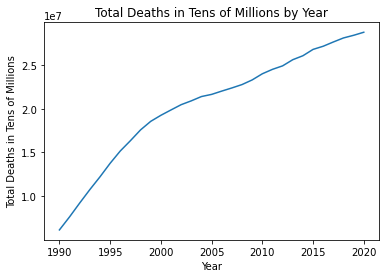

In [50]:
# line plot
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(data = aids.groupby('Year')['Data.People Living with HIV.Total'].sum())
ax.set(ylabel='Total Deaths in Tens of Millions', title = 'Total Deaths in Tens of Millions by Year')

Text(0.5, 1.0, 'Total Flights by Month in Millions')

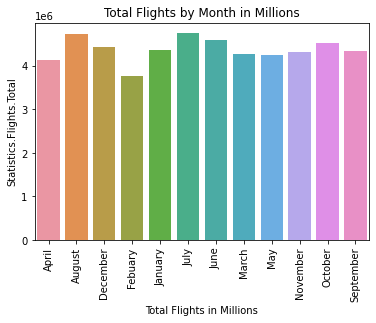

In [55]:
# bar plot
sns.barplot(data = airlines.groupby('Time.Month Name')['Statistics.Flights.Total'].sum().reset_index(), x = 'Time.Month Name', y = 'Statistics.Flights.Total')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.xlabel('Total Flights in Millions')
plt.title('Total Flights by Month in Millions')

Text(0.5, 1.0, 'Histogram of Mission Duration')

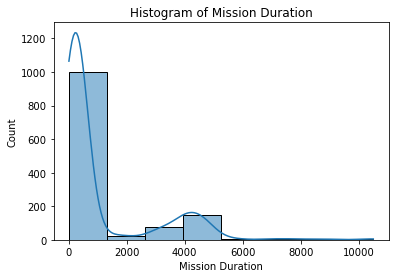

In [65]:
# histogram
astronauts.head()
sns.histplot(data= astronauts, x='Mission.Durations.Mission duration', bins=8, kde=True)
plt.xlabel('Mission Duration')
plt.title('Histogram of Mission Duration')

# Submit
Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top